In [1]:
#IBM Machine Learning course on coursera.com
#Multiple Linear Regression Model
#Yana Hrytsenko


import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
#Downloading Data
#To download the data, we will use !wget to download it from IBM Object Storage.

!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv


--2020-06-25 18:03:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2020-06-25 18:03:12 (1.64 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
#Reading the data in
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
#Lets select some features that we want to use for regression.
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


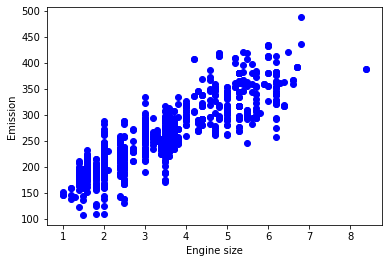

In [5]:
#Lets plot Emission values with respect to Engine size:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [6]:
'''
Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively,
which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset
is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with!
And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points.
So, in essence, it’s truly an out-of-sample testing.
'''
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

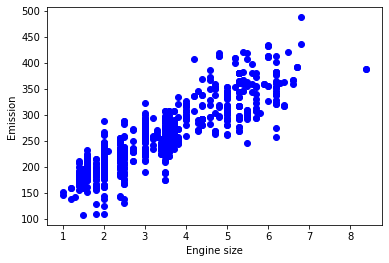

In [7]:
#Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [8]:
#Multiple Regression model
'''
In reality, there are multiple variables that predict the Co2emission.
When more than one independent variable is present, the process is called multiple linear regression.
For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars.
The good thing here is that Multiple linear regression is the extension of simple linear regression model.
'''
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[12.74240999  6.60416186  9.18109038]]


In [9]:
'''
As mentioned before, Coefficient and Intercept , are the parameters of the fit line.
Given that it is a multiple linear regression, with 3 parameters,
and knowing that the parameters are the intercept and coefficients of hyperplane,
sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model.
OLS chooses the parameters of a linear function of a set of explanatory variables
by minimizing the sum of the squares of the differences between the target dependent variable
and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE)
or mean squared error (MSE) between the target variable (y) and our predicted output ( 𝑦̂  ) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
- Solving the model parameters analytically using closed-form equations
- Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)
'''

'\nAs mentioned before, Coefficient and Intercept , are the parameters of the fit line.\nGiven that it is a multiple linear regression, with 3 parameters,\nand knowing that the parameters are the intercept and coefficients of hyperplane,\nsklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.\n\nOrdinary Least Squares (OLS)\nOLS is a method for estimating the unknown parameters in a linear regression model.\nOLS chooses the parameters of a linear function of a set of explanatory variables\nby minimizing the sum of the squares of the differences between the target dependent variable\nand those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE)\nor mean squared error (MSE) between the target variable (y) and our predicted output ( 𝑦̂  ) over all samples in the dataset.\n\nOLS can find the best parameters using of the following methods:\n- Solving the model parameters analyt

In [10]:
#Prediction
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))


Residual sum of squares: 585.04
Variance score: 0.85


In [ ]:
'''
explained variance regression score:
If  𝑦̂   is the estimated target output, y the corresponding (correct) target output,
and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

𝚎𝚡𝚙𝚕𝚊𝚒𝚗𝚎𝚍𝚅𝚊𝚛𝚒𝚊𝚗𝚌𝚎(𝑦,𝑦̂ )=1−𝑉𝑎𝑟{𝑦−𝑦̂ }𝑉𝑎𝑟{𝑦}
The best possible score is 1.0, lower values are worse.
'''

In [ ]:
'''
Practice
Try to use a multiple linear regression with the same dataset but this time
use __FUEL CONSUMPTION in CITY__ and __FUEL CONSUMPTION in HWY__ instead of FUELCONSUMPTION_COMB.
Does it result in better accuracy?
'''

In [11]:
# write your code here
#Training
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY' ]])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

#Prediction
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[12.74712705  6.62159741  4.98729952  4.21141095]]
Residual sum of squares: 586.50
Variance score: 0.85
